In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns

In [2]:
df=pd.read_csv("Downloads/gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.shape
df.info()
df.describe()
df.isnull().sum()

(2290, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
df["Date"]=pd.to_datetime(df["Date"],format="%m/%d/%Y")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [13]:
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [14]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,02/01/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,03/01/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,04/01/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,07/01/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,08/01/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# always check for regression problems
# going to check corrlations

## positive:  when one variable rises or falls, the other does the same. 
## negative : A negative correlation is when two variables move opposite one another so that when one variable rises, the other falls.
### basically telling the relation between the 2 columns 

In [20]:
corrlations= df.corr()

/var/folders/zp/yykz6vt92kgckn24pqx3zc7w0000gn/T/ipykernel_1678/2805711298.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrlations= df.corr()


<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

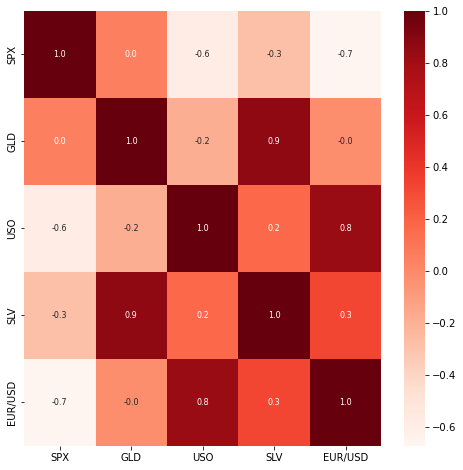

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(corrlations,cbar=True,square=False,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Reds")

In [28]:
corrlations["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/Users/smithss/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

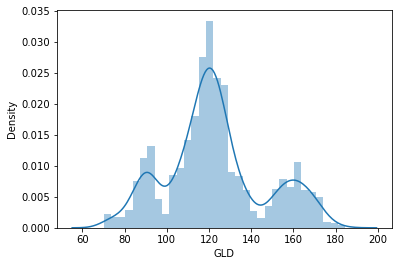

In [29]:
sns.distplot(df.GLD)

/Users/smithss/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='GLD'>

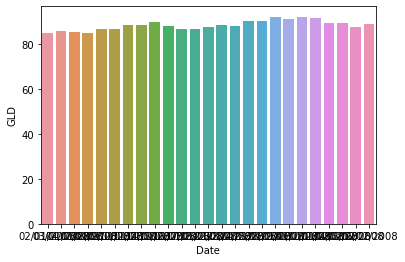

In [32]:
sns.barplot(df.Date[:25],df.GLD[:25])

In [39]:
x=df.drop(["Date","GLD"],axis=1)
y=df["GLD"]

In [65]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
model_RandomForestRegressor=RandomForestRegressor(n_estimators=100)

In [68]:
model_RandomForestRegressor.fit(x_train,y_train)

RandomForestRegressor()

In [69]:
model_RandomForestRegressor.score(x_test,y_test)

0.9894160044052137

In [70]:
pre=model_RandomForestRegressor.predict(x_test)
pre

array([168.56929959,  82.31229981, 116.24420037, 127.50210071,
       120.6559011 , 154.82339782, 150.1422987 , 126.08590053,
       117.43289883, 126.04450041, 116.61050071, 172.81450137,
       141.59769927, 167.47389843, 115.30259988, 117.68940041,
       138.76710328, 169.76660085, 159.20750338, 157.44739887,
       155.20540079, 125.1440001 , 175.25660032, 156.47060444,
       125.28380026,  93.81659961,  77.41149995, 120.32220032,
       119.08589904, 167.49059926,  87.9806003 , 125.31959999,
        91.12000071, 117.80940006, 121.18629925, 136.42970063,
       115.44520124, 114.94280057, 146.93229982, 107.28150095,
       104.27310263,  87.03759776, 126.35410036, 117.79319984,
       153.95509876, 119.74000023, 108.30799973, 108.10709804,
        93.15970033, 127.21019756,  74.93740034, 113.62229889,
       121.28140026, 111.24079955, 118.76759873, 120.80859955,
       158.66610024, 166.83040098, 146.90169705,  86.01899866,
        94.29050033,  86.73789862,  90.62190008, 119.00

No handles with labels found to put in legend.


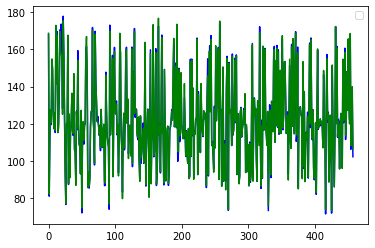

In [73]:
plt.plot(list(y_test),color="blue")
plt.plot(pre,color="green")
plt.legend()
plt.show()